### Notebook to showcase thesis idea and wavelets, CWT, DWT
### Created by Ismail Elnaggar , imelna@utu.fi

### Reference links:

1. https://www.math.aau.dk/digitalAssets/120/120646_r-2003-24.pdf
2. http://web.iitd.ac.in/~sumeet/WaveletTutorial.pdf
3. http://disp.ee.ntu.edu.tw/tutorial/WaveletTutorial.pdf
4. https://pywavelets.readthedocs.io/en/latest/#getting-help
5. http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/


### Imports

In [3]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#scipy / signal processing imports
from scipy import signal
from scipy import io
from scipy.stats import entropy,mode, pearsonr,spearmanr
from scipy.interpolate import interp1d
from scipy import fftpack
import pywt

#sklearn imports
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift


#entropy
#from entropy import *
#datetime
from datetime import datetime

#other
from collections import defaultdict, Counter
import glob
import pprint as pp
import time

### Custom functions

In [4]:
#function to normalize signal values to 1 to -1

def normalizesig(data):
    x=np.array(data)
    p1=x-min(x)
    p2=max(x) - min(x)
    return 2 * (p1/p2) - 1

In [5]:
### fft function

def get_fft_values(y_values, fs):
    """When the input a is a time-domain signal and A = fft(a),
    np.abs(A) is its amplitude spectrum and
    np.abs(A)**2 is its power spectrum. The phase spectrum is obtained by np.angle(A).
    
    y_values= time series data
    fs= sampling frequency of the data
    """
    
    realfreq=np.fft.rfftfreq(len(y_values),d = 1.0/fs) #returns real valued portion of fft only 
   
    ####fft_values=(np.fft.rfft(y_values,axis=0)) fft
    ##fft_values=np.abs((np.fft.rfft(y_values,axis=0))) #realfft #AMPLITUDE SPECTRUM
   
    fft_values=np.abs((np.fft.rfft(y_values,axis=0)))**2 #POWER SPECTRUM

    return realfreq, fft_values 

In [6]:
#for thresholding in dwt 
def lowpassfilter(signal, thresh = 0.63, wavelet="db4"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

In [7]:
from matplotlib import ticker, cm

def plot_wavelet(ax, time2, signal, scales, waveletname = 'cmor', 
                 cmap =plt.cm.seismic, title = '', ylabel = '', xlabel = ''):
    
    #cmap=plt.cm.seismic
    #cmap=plt.get_cmap('PiYG')
    #dt = time[1] - time[0]
    dt=time2
    coefficients, frequencies = pywt.cwt(signal, scales, waveletname, dt)
    print ("coeff shape is:",coefficients.shape)
    print ("frequency shape is:", frequencies.shape)
    power = (abs(coefficients)) ** 2
    period = frequencies
    #levels = [0.015625,0.03125,0.0625, 0.125, 0.25, 0.5, 1]
    levels = [0.00195312,0.00390625,0.0078125,0.015625,0.03125,0.0625, 0.125, 0.25, 0.5,1,2,4,8,16,32,64,128,256,512]
    #levels = [0.00097656,0.00195312,0.00390625,0.0078125,0.015625,0.03125,0.0625, 0.125, 0.25, 0.5,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192]
    #levels = [0.03125,0.0625, 0.125, 0.25, 0.5,1,2,4]
    #contourlevels=levels
    contourlevels = np.log2(levels) #original
    time=range(2048)
    
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    #im = ax.contourf(time, period, power, contourlevels, extend='both',cmap=cmap)
    #cs = ax.contourf(time, np.log2(period), np.log2(power), locator=ticker.LogLocator(), cmap=cm.PuBu_r)
    #print (im)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    #yticks =2**np.arange(np.ceil(period.min()),np.ceil(period.max()))
    #ax.set_yticks(yticks)
    #ax.set_yticklabels(yticks)
    
    ax.set_yticks(np.log2(yticks)) #original
    ax.set_yticklabels(yticks) #original
    
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    #ax.set_ylim(ylim[0], -1)
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    #cbar = fig.colorbar(cs)
    return yticks, ylim


In [8]:
levels = [0.00195312,0.00390625,0.0078125,0.015625,0.03125,0.0625, 0.125, 0.25, 0.5,1,2,4,8,16,32,64,128,256,512]

contourlevels = np.log2(levels)

print (contourlevels)

[-9.00000369 -8.         -7.         -6.         -5.         -4.
 -3.         -2.         -1.          0.          1.          2.
  3.          4.          5.          6.          7.          8.
  9.        ]


### Sine wave example
1. Show how a Sinwave can be interpreted in the time and freq domain
2. using fft, cwt, and dwt

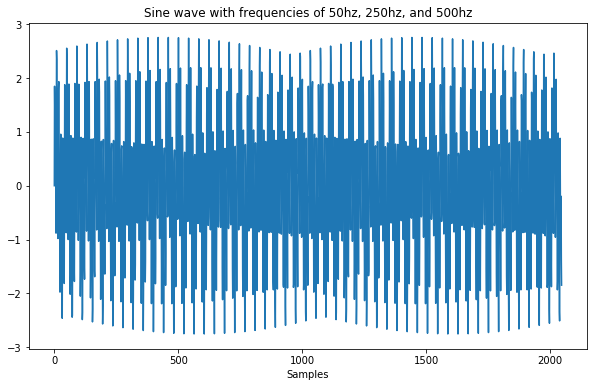

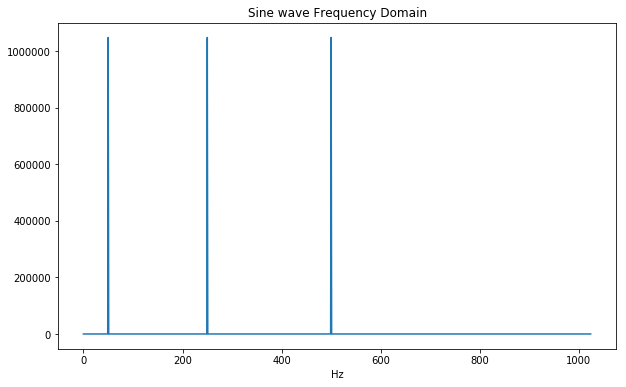

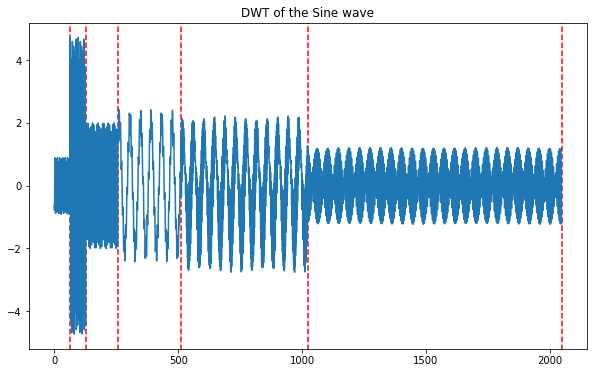

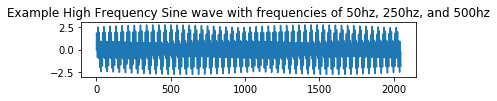

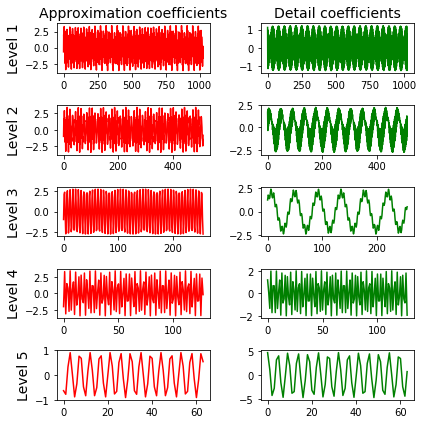

Sampling frequency of 2048hz, 2048 samples equals to 1 second
coeff shape is: (99, 2048)
frequency shape is: (99,)


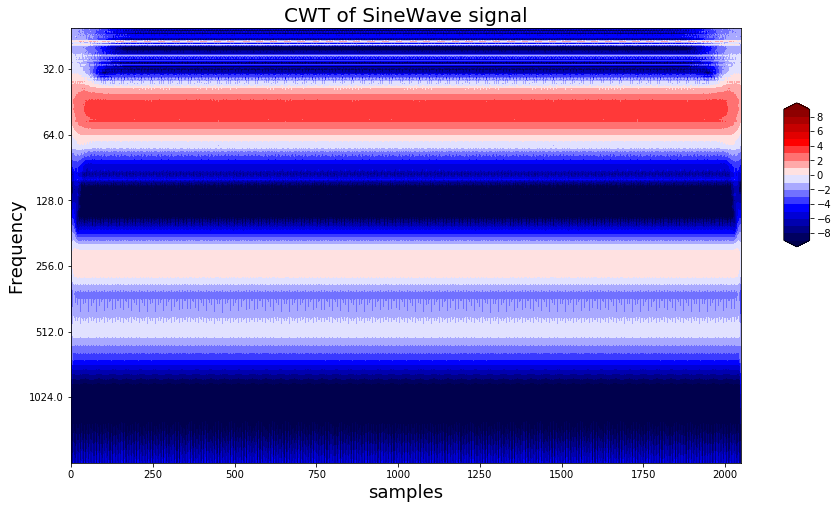

In [9]:
### example of a sine wave expressed in with different transforms 


fs = 2048 #sample rate 
f = 150    #frequency of the signal
samples=2048
x = np.arange(samples) # the points on the x axis for plotting

#create the signal 
y_high_freq = np.sin(2* np.pi * (50) * (x/fs)) + np.sin(2* np.pi * (250) * (x/fs)) + np.sin(2* np.pi * (500) * (x/fs))  

y_hfx,y_hfy= get_fft_values(y_high_freq , fs)

plt.figure(figsize=(10,6))
plt.plot(y_high_freq )
plt.title("Sine wave with frequencies of 50hz, 250hz, and 500hz")
plt.xlabel("Samples")
plt.show()


plt.figure(figsize=(10,6))
plt.plot(y_hfx,y_hfy)
plt.title("Sine wave Frequency Domain")
plt.xlabel("Hz")
plt.show()


###########
#fft
testdwt=[]
xval=0
xvallist=[]
dwtcoeffs=pywt.wavedec(y_high_freq,wavelet="db2",mode="per",level=5)

for i in dwtcoeffs:
    xval+=len(i) #subband length
    xvallist.append(xval) #subband position
    testdwt.extend(i) #dwt subband extended


ymin=min(testdwt)
ymax=max(testdwt)

plt.figure(figsize=(10,6))
for xv in xvallist:
    plt.axvline(x=xv,ymin=ymin,ymax=ymax,color="r",ls="--")
plt.plot(testdwt)
plt.title("DWT of the Sine wave")
plt.show()

###########
#showing both aprox and detail coefs
#dwt
examplesignal= y_high_freq 

fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Example High Frequency Sine wave with frequencies of 50hz, 250hz, and 500hz")
ax.plot(examplesignal)
plt.show()

data = examplesignal
waveletname = 'db2' 
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname,mode='per')
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    
plt.tight_layout()
plt.show()

############
#cwt
scale_range = np.arange(1, 100)
fs=2048
sp =1/fs
print ("Sampling frequency of 2048hz, 2048 samples equals to 1 second")
#pywt.cwt(normsigdict["masse"][212048+(sli):214096+(sli)],scale_range,'cmor1.5-1.0',sampling_period=sp
fig, ax = plt.subplots(figsize=(12, 8))
plot_wavelet(ax=ax, time2=sp, signal=examplesignal, scales=scale_range,waveletname='cmor1.5-1.0',
             title = "CWT of SineWave signal", ylabel = "Frequency", xlabel = "samples")
plt.show()

### second example chirp signal

1. Show how a chrip signal can be interpreted in the time and freq domain
2. This is to show how Continuous wavelet transform can visually show the change in frequency of a signa over time when compared to a stationary sinwave
3. using fft, cwt, and dwt

from math import pi, sin, log, exp

def sweep(f_start, f_end, interval, n_steps):
    b = log(f_end/f_start) / interval
    a = 2 * pi * f_start / b
    for i in range(n_steps):
        delta = i / float(n_steps)
        t = interval * delta
        g_t = a * exp(b * t)
        plt.plot(t, 3 * sin(g_t))

sweep(1, 10, 5, 1000)

C:\Users\imelna\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\imelna\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sin
  This is separate from the ipykernel package so we can avoid doing imports until


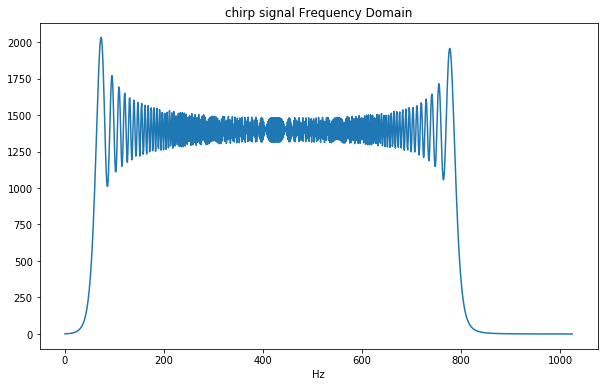

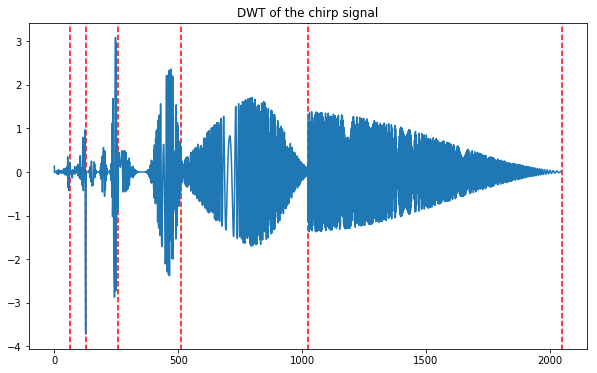

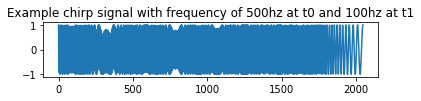

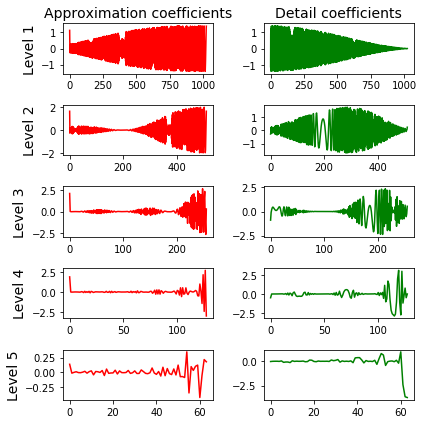

Sampling frequency of 2048hz, 2048 samples equals to 1 second
coeff shape is: (99, 2048)
frequency shape is: (99,)


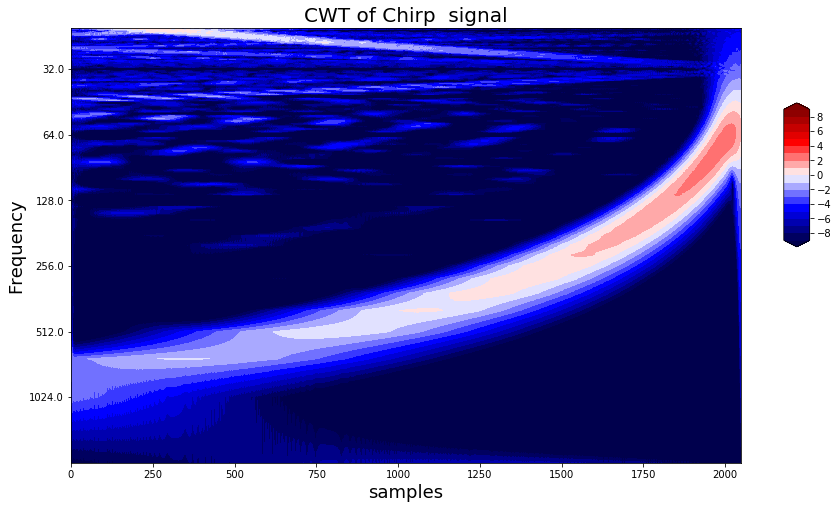

In [13]:
t= np.linspace(0, 1, 2048)

signal2 = np.sin(40 * np.log(t)) * np.sign((np.log(t)))
#signalchirp=signal2
signalchirp=signal.chirp(t, f0=800, f1=50, t1=1, method='lin')
### example of a sine wave expressed in with different transforms 


fs = 2048 #sample rate 
f = 150    #frequency of the signal
samples=2048
x = np.arange(samples) # the points on the x axis for plotting

#create the signal 
y_high_freq=signalchirp
y_hfx,y_hfy= get_fft_values(y_high_freq , fs)


plt.figure(figsize=(10,6))
plt.plot(y_hfx,y_hfy)
plt.title("chirp signal Frequency Domain")
plt.xlabel("Hz")
plt.show()


###########
#fft
testdwt=[]
xval=0
xvallist=[]
dwtcoeffs=pywt.wavedec(y_high_freq,wavelet="db2",mode="per",level=5)

for i in dwtcoeffs:
    xval+=len(i) #subband length
    xvallist.append(xval) #subband position
    testdwt.extend(i) #dwt subband extended


ymin=min(testdwt)
ymax=max(testdwt)

plt.figure(figsize=(10,6))
for xv in xvallist:
    plt.axvline(x=xv,ymin=ymin,ymax=ymax,color="r",ls="--")
plt.plot(testdwt)
plt.title("DWT of the chirp signal")
plt.show()

###########
#showing both aprox and detail coefs
#dwt
examplesignal= y_high_freq 

fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Example chirp signal with frequency of 500hz at t0 and 100hz at t1")
ax.plot(examplesignal)
plt.show()

data = examplesignal
waveletname = 'db2' 
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname,mode='per')
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    
plt.tight_layout()
plt.show()

############
#cwt
scale_range = np.arange(1, 100)
fs=2048
sp =1/fs
print ("Sampling frequency of 2048hz, 2048 samples equals to 1 second")
#pywt.cwt(normsigdict["masse"][212048+(sli):214096+(sli)],scale_range,'cmor1.5-1.0',sampling_period=sp
fig, ax = plt.subplots(figsize=(12, 8))
plot_wavelet(ax=ax, time2=sp, signal=examplesignal, scales=scale_range,waveletname='cmor1.5-1.0',
             title = "CWT of Chirp  signal", ylabel = "Frequency", xlabel = "samples")
plt.show()

### test different scale ranges of the fr

Sampling frequency of 2048hz, 2048 samples equals to 1 second
coeff shape is: (149, 2048)
frequency shape is: (149,)


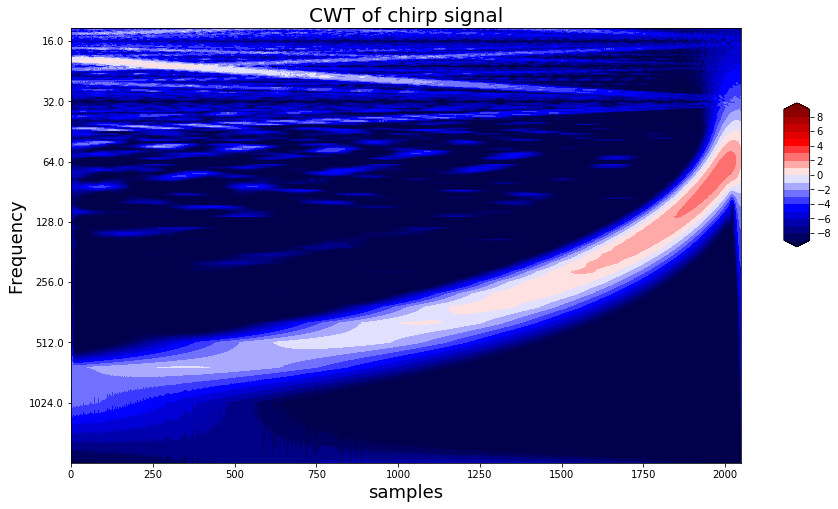

In [17]:
scale_range = np.arange(1, 150)
fs=2048
sp =1/fs
print ("Sampling frequency of 2048hz, 2048 samples equals to 1 second")
#pywt.cwt(normsigdict["masse"][212048+(sli):214096+(sli)],scale_range,'cmor1.5-1.0',sampling_period=sp
fig, ax = plt.subplots(figsize=(12, 8))
plot_wavelet(ax=ax, time2=sp, signal=examplesignal, scales=scale_range,waveletname='cmor1.5-1.0',
             title = "CWT of chirp signal", ylabel = "Frequency", xlabel = "samples")
plt.show()

### EMG Section

### import Phase A and B from dataset

Notes about phase A and phase B:
link to dataset: https://tutcris.tut.fi/portal/en/publications/mimetic-interfaces-facial-surface-emg-dataset-2015-data-and-software(6560b450-5a66-41c4-8221-8564663ad9ed).html

1. In Phase A, the participant performed voluntary smile, lip pucker, and frown movement tasks while EMG signals from zygomaticus major, orbicularis oris, orbicularis oculi, and corrugator supercilii were measured from the right side of the face.

2. In the B phase measurement from the zygomaticus major, orbicularis oris, orbicularis oculi, and masseter from the right side of the face while the participant performed smile and pucker movement tasks while chewing a gum were recorded.

3. Both phases had resting tasks between the movement tasks.

4. Phases started with a 1-minute-long resting task. Then 10 repetitions of each movement tasks were performed in randomized order. Each task lasted for 6 seconds. The movements were instructed to be performed as naturally as possible for the time that an on-screen instruction was visible.

5. The used experimental software was E-Prime [1] stimulation software. The facial surface EMG signals were measured with a NeXus-10 physiological monitoring device by Mind Media BV.

6. The sampling rate was 2048 Hz.

### label values
Phase A
1. neutral
2. smile
3. pucker 
4. frown

Phase B

5. chew (neutral)
6. chew and smile
7. chew and pucker
8. eye blink

In [8]:
### Phase A

path = r'S:/Shared with me/spa2_ismail_shared/TampereUni_femg_data' # use your path
all_files = glob.glob(path + "/*A.csv")

# 'corrugator supercilii' , ''zygomaticus major'' , ''orbicularis oris'', ''orbicularis oculi''

emgdict_a=dict() #create a dictonary containing all the patient dataframes
c=0
for i in range(0,len(all_files)):
    emgdict_a["{0}".format(all_files[i][-7:-5])] = pd.read_csv(all_files[i], index_col=None, header=None)
    emgdict_a["{0}".format(all_files[i][-7:-5])].drop([0],axis=1, inplace=True)
    emgdict_a["{0}".format(all_files[i][-7:-5])].rename(columns={1 : "corrugator supercilii",
                                                               2 : "zygomaticus major",
                                                              3 : "orbicularis oris",
                                                              4 : "orbicularis oculi",
                                                        5 : "L"},inplace=True)
print ("Phase A import complete")

Phase A import complete


In [9]:
## Phase B

path = r'C:/Users/imelna/Documents/TUT_Dataset/Mimetic_Interfaces-Facial_Surface_EMG_Dataset_2015/Data' # use your path
all_files = glob.glob(path + "/*B.csv")

# 'masseter' , 'zygomaticus major' , 'orbicularis oris', 'orbicularis oculi'

emgdict_b=dict() #create a dictonary containing all the patient dataframes
c=0
for i in range(0,len(all_files)):
    emgdict_b["{0}".format(all_files[i][-7:-5])] = pd.read_csv(all_files[i], index_col=None, header=0)
    emgdict_b["{0}".format(all_files[i][-7:-5])].drop(["idx"],axis=1, inplace=True)
    emgdict_b["{0}".format(all_files[i][-7:-5])].rename(columns={"Eraw_1" : "masseter",
                                                               "Eraw_2" : "zygomaticus major",
                                                              "Eraw_3" : "orbicularis oris",
                                                              "Eraw_4" : "orbicularis oculi"},inplace=True)

print ("Phase B import complete")

Phase B import complete


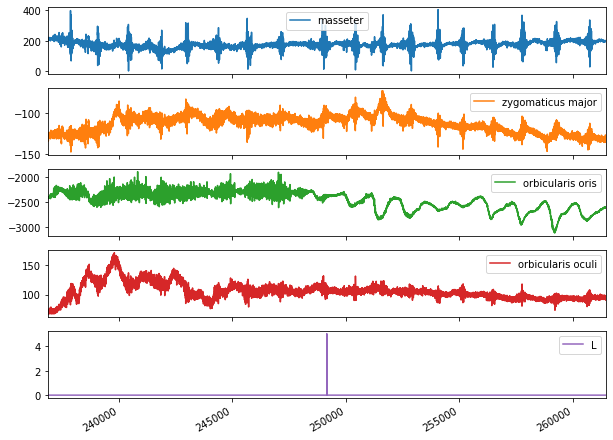

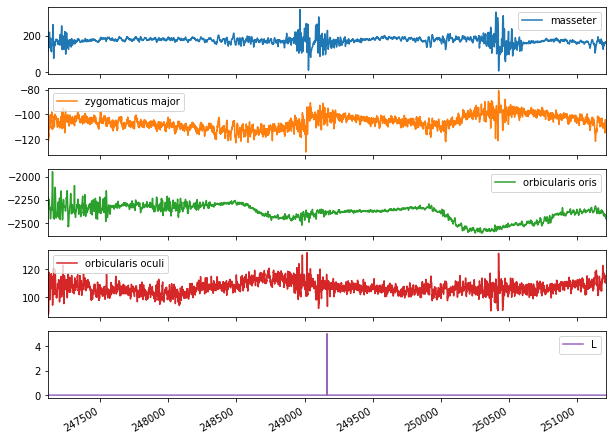

In [10]:
### Example of phase B signals from patient 02 

#label value of 5 at this sample 249165 chewing
emgdict_b["02"].iloc[249165-(2046*6):249165+(2046*6)].plot(subplots=True,figsize=(10,8))
plt.show()



emgdict_b["02"].iloc[249165-(2048):249165+(2048)].plot(subplots=True,figsize=(10,8))
plt.show()

In [ ]:
plt.plot(rawsigdict["zygm"])
plt.show()
plt.plot(emgdict_b["02"]["zygomaticus major"])
plt.show()

In [11]:
dwt_phase_b=dict()
NR_dict=dict() #lpf not normalized
rawsigdict=dict() ###raw signal

dwtlevels=["lvl1","lvl2","lvl3","lvl4","lvl5","lvl5A"]
noiseRemoved=["NR_masse","NR_zygm","NR_oris","NR_oculi"]
normsigkeys=["masse","zygm","oris","oculi"]

S=2048
N=len(emgdict_b["02"])//S 
meanr=emgdict_b["02"]-np.mean(emgdict_b["02"])
meanremoved=meanr.apply(lambda y: normalizesig(y))
chunks=[meanremoved.iloc[j*S:(j+1)*S,0:4].copy() for j in range(N+1)] #select only emg channels
if len(chunks[-1]) != 2048: ###delete the last segment because it most likely will be less
    del chunks[-1]
NR_dict={key: [] for key in noiseRemoved}
rawsigdict={key: [] for key in normsigkeys}
for m in range(0,len(chunks)):
    #normChunk=chunks[m].apply(lambda y: normalizesig(y))
    #NRchunk=normChunk.apply(lambda y: lowpassfilter(y,.4))
    NRchunk=chunks[m].apply(lambda y: lowpassfilter(y,.1,"coif5"))
    muscleind=0
    for k in NR_dict:
        NR_dict[k].extend(NRchunk.iloc[:,muscleind])
        muscleind+=1
    muscleind=0
    for k in rawsigdict:
        rawsigdict[k].extend(chunks[m].iloc[:,muscleind])
        muscleind+=1
    muscleind=0
    #dwtchunk=chunks[m].apply(lambda y: pywt.wavedec(y,wavelet="db2",mode="per",level=5))
    #for sp in range(0,24):

In [12]:
dwt_phase_b=dict()
NR_normdict=dict() # lpf normalized signal
normsigdict=dict() #rawsig normalized

dwtlevels=["lvl1","lvl2","lvl3","lvl4","lvl5","lvl5A"]
noiseRemoved=["NR_masse","NR_zygm","NR_oris","NR_oculi"]
normsigkeys=["masse","zygm","oris","oculi"]

S=2048
N=len(emgdict_b["02"])//S 
#nsig=emgdict_b["02B"].apply(lambda y: normalizesig(y))
chunks=[emgdict_b["02"].iloc[j*S:(j+1)*S,0:4].copy() for j in range(N+1)] #select only emg channels
if len(chunks[-1]) != 2048: ###delete the last segment because it most likely will be less
    del chunks[-1]
NR_normdict={key: [] for key in noiseRemoved}
normsigdict={key: [] for key in normsigkeys}
for m in range(0,len(chunks)):
    normChunk=chunks[m].apply(lambda y: normalizesig(y))
    NRchunk=normChunk.apply(lambda y: lowpassfilter(y,.1,"coif5"))
    #NRchunk=chunks[m].apply(lambda y: lowpassfilter(y,.4))
    muscleind=0
    for k in NR_dict:
        
        NR_normdict[k].extend(NRchunk.iloc[:,muscleind])
        muscleind+=1
    muscleind=0
    for k in normsigdict:
        normsigdict[k].extend(normChunk.iloc[:,muscleind])
        muscleind+=1
    muscleind=0
    #dwtchunk=chunks[m].apply(lambda y: pywt.wavedec(y,wavelet="db2",mode="per",level=5))
    #for sp in range(0,24):

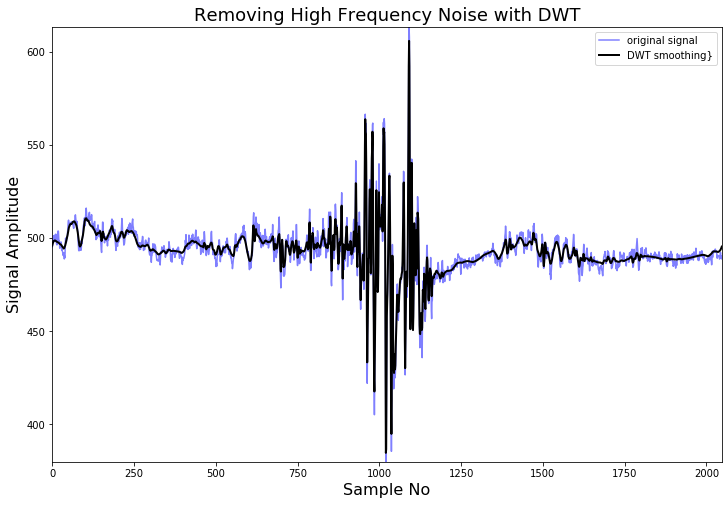

coeff shape is: (249, 2048)
frequency shape is: (249,)


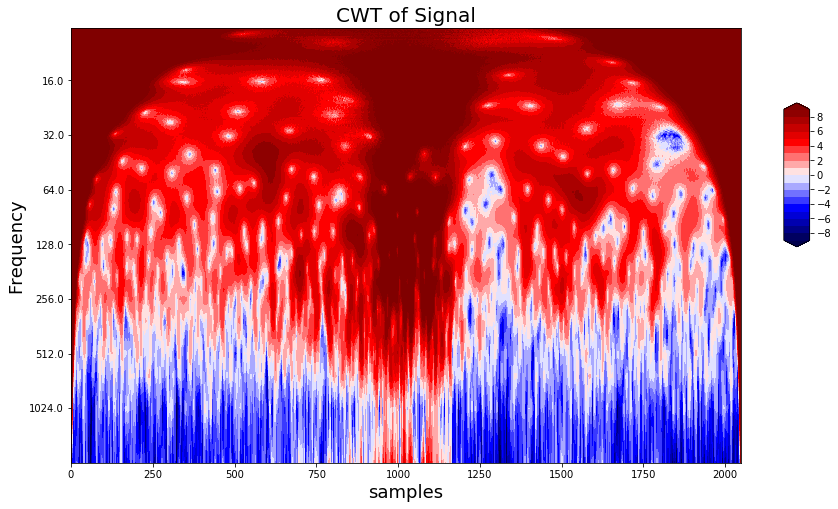

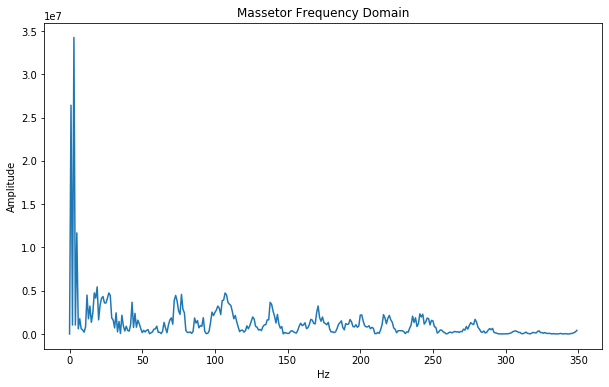

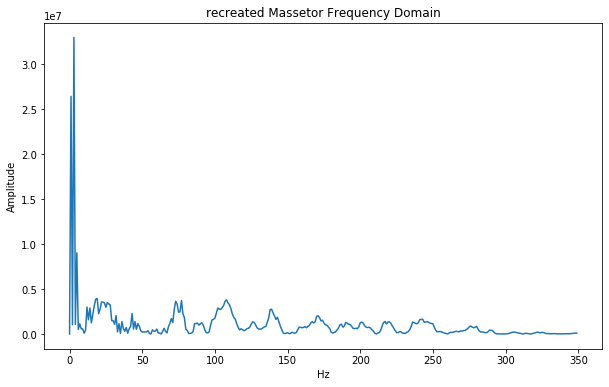

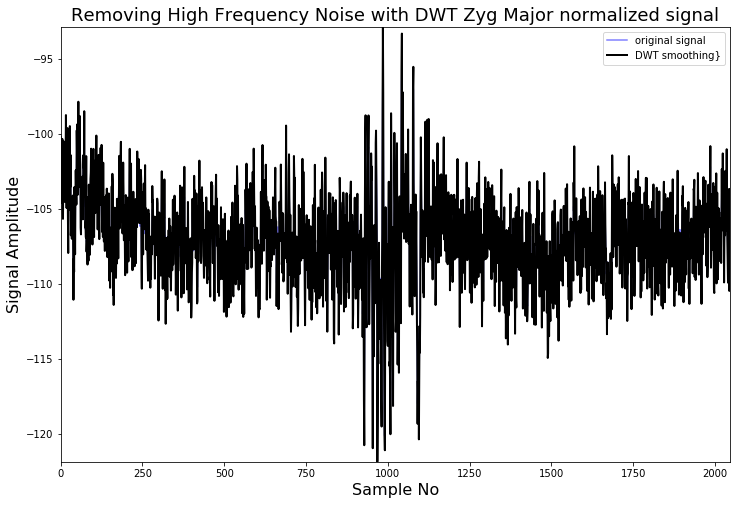

coeff shape is: (249, 2048)
frequency shape is: (249,)


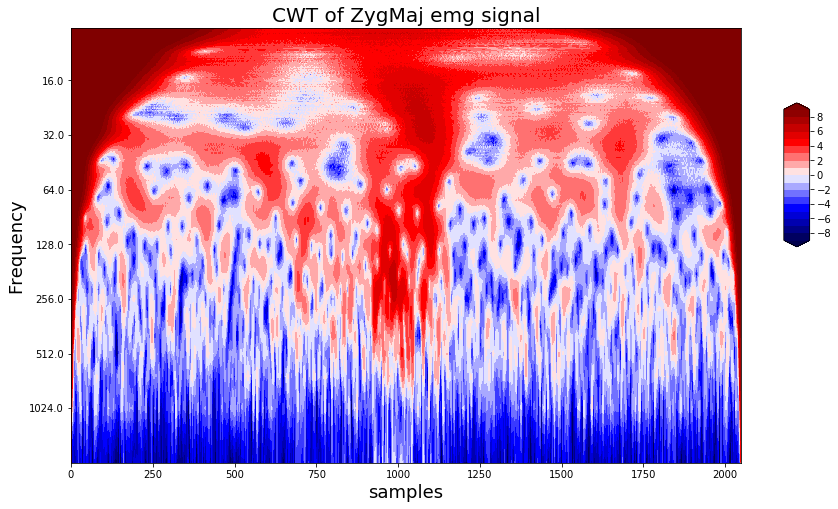

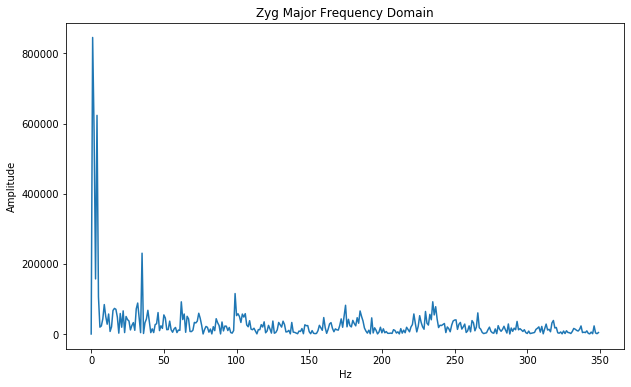

[0 7]


In [13]:
fs=2048
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Frequency'
xlabel = 'samples'

sli=(2048*84) #second stamp
###coif5
#masseter
#normalized signals

#signal=normalizesig(emgdict_b["02B"]["masseter"].iloc[212048+(sli):214096+(sli)])
scale_range = np.arange(1, 250)
#signal=rawsigdict["masse"][212048+(sli):214096+(sli)]
signal=emgdict_b["02"]["masseter"][212048+(sli):214096+(sli)]
#rec=NR_dict["NR_masse"][212048+(sli):214096+(sli)]
xrange=list(range(2048))
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xrange,signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.01)
ax.plot(xrange,rec, 'k', label='DWT smoothing}', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.margins(0)
plt.show()


fig, ax = plt.subplots(figsize=(12, 8))
plot_wavelet(ax=ax, time2=sp, signal=signal, scales=scale_range,waveletname='cmor1.5-1.0',
             title = "CWT of Signal", ylabel = ylabel, xlabel = xlabel)
plt.show()

mr=(signal-np.mean(signal))
y_hfx,y_hfy= get_fft_values(mr , fs)
plt.figure(figsize=(10,6))
plt.plot(y_hfx[:350],y_hfy[:350])
plt.title("Massetor Frequency Domain")
plt.xlabel("Hz")
plt.ylabel("Amplitude")
plt.show()


mr=(rec-np.mean(rec))
y_hfx,y_hfy= get_fft_values(mr , fs)
plt.figure(figsize=(10,6))
plt.plot(y_hfx[:350],y_hfy[:350])
plt.title("recreated Massetor Frequency Domain")
plt.xlabel("Hz")
plt.ylabel("Amplitude")
plt.show()


#Zyg Major


#signal=normalizesig(emgdict_b["02B"]["zygomaticus major"].iloc[212048+(sli):214096+(sli)])
#signal=rawsigdict["zygm"][212048+(sli):214096+(sli)]
signal=emgdict_b["02"]["zygomaticus major"][212048+(sli):214096+(sli)]
#rec=NR_dict["NR_zygm"][212048+(sli):214096+(sli)]
xrange=list(range(2048))
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xrange,signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.01)
ax.plot(xrange,rec, 'k', label='DWT smoothing}', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT Zyg Major normalized signal', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.margins(0)
plt.show()


fig, ax = plt.subplots(figsize=(12, 8))
plot_wavelet(ax=ax, time2=sp, signal=signal, scales=scale_range,waveletname='cmor1.5-1.0',
             title = "CWT of ZygMaj emg signal", ylabel = ylabel, xlabel = xlabel)
plt.show()

mr=signal-np.mean(signal)
y_hfx,y_hfy= get_fft_values(mr , fs)
plt.figure(figsize=(10,6))
plt.plot(y_hfx[:350],y_hfy[:350])
plt.title("Zyg Major Frequency Domain")
plt.xlabel("Hz")
plt.ylabel("Amplitude")
plt.show()


print (emgdict_b["02"]["L"].iloc[212048+(sli):214096+(sli)].unique())

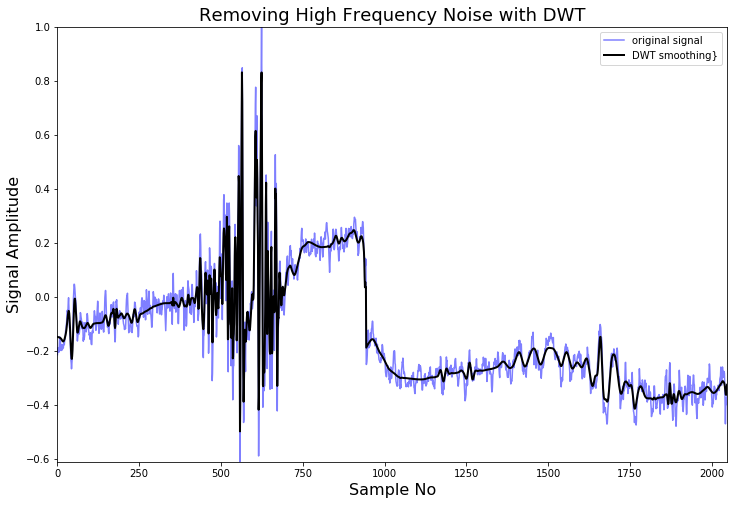

coeff shape is: (149, 2048)
frequency shape is: (149,)


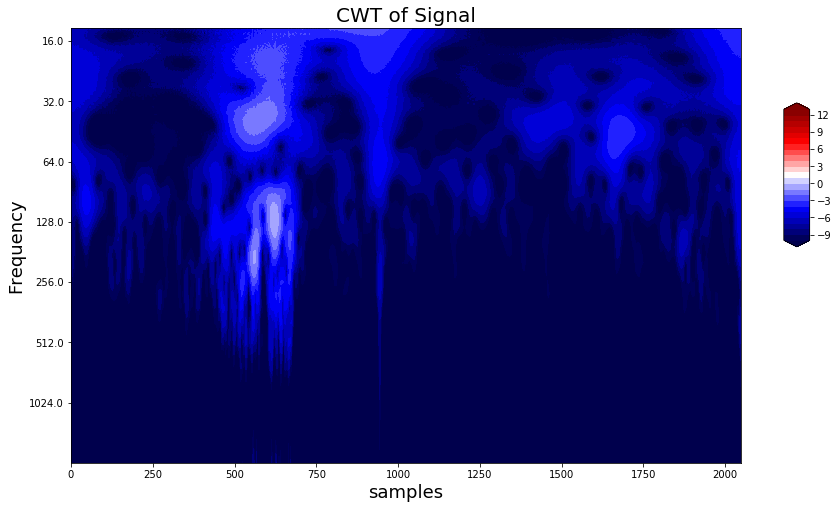

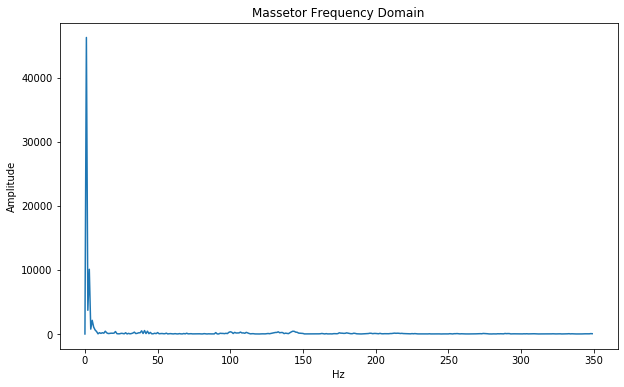

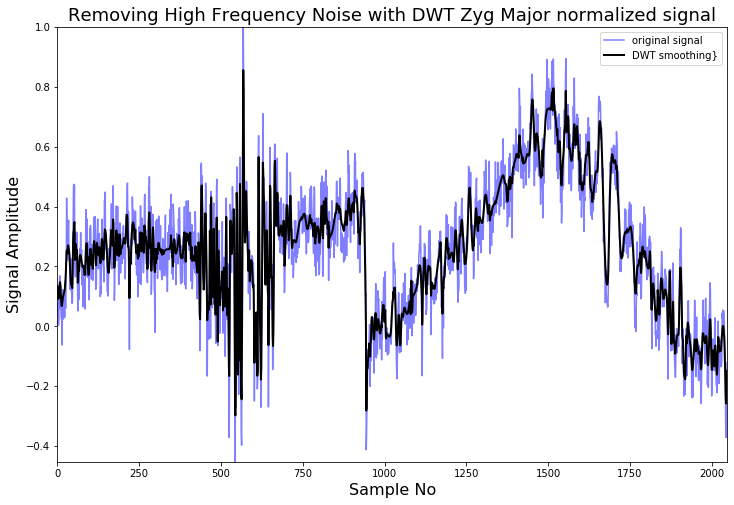

coeff shape is: (149, 2048)
frequency shape is: (149,)


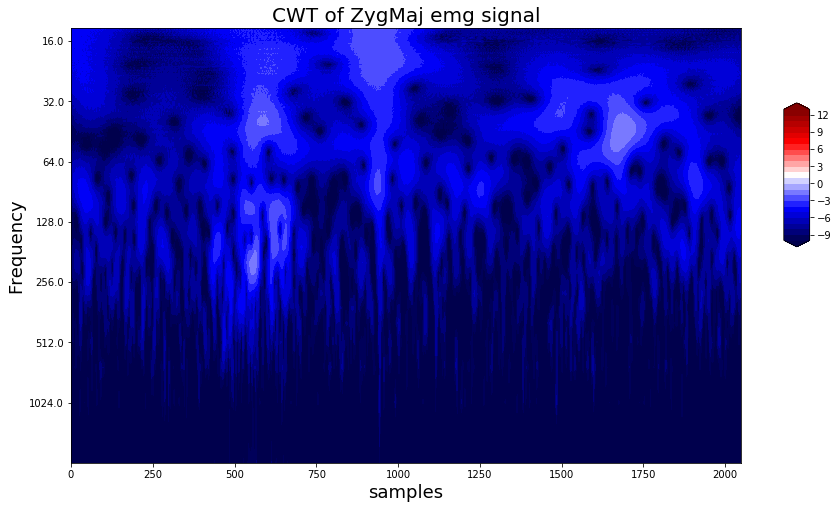

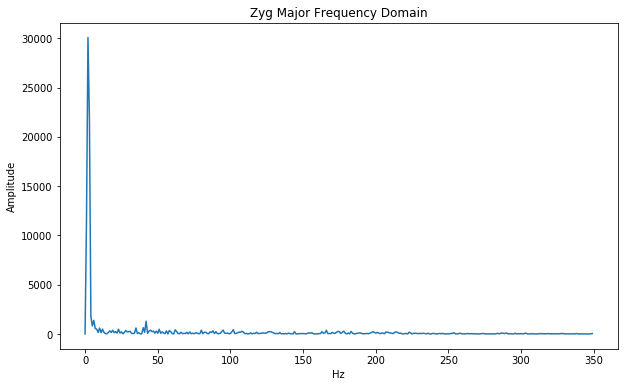

[0]


In [18]:
fs=2048
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Frequency'
xlabel = 'samples'

#sli=(2048*39) #second stamp
###coif5
#masseter
#normalized signals

#signal=normalizesig(emgdict_b["02B"]["masseter"].iloc[212048+(sli):214096+(sli)])
scale_range = np.arange(1, 150)
signal=normsigdict["masse"][212048+(sli):214096+(sli)]
rec=NR_normdict["NR_masse"][212048+(sli):214096+(sli)]
xrange=list(range(2048))
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xrange,signal, color="b", alpha=0.5, label='original signal')
#rec = lowpassfilter(signal, 0.4)
ax.plot(xrange,rec, 'k', label='DWT smoothing}', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.margins(0)
plt.show()


fig, ax = plt.subplots(figsize=(12, 8))
plot_wavelet(ax=ax, time2=sp, signal=normsigdict["masse"][212048+(sli):214096+(sli)], scales=scale_range,waveletname='cmor1.5-1.0',
             title = "CWT of Signal", ylabel = ylabel, xlabel = xlabel)
plt.show()

y_hfx,y_hfy= get_fft_values((signal-np.mean(signal)) , fs)
plt.figure(figsize=(10,6))
plt.plot(y_hfx[:350],y_hfy[:350])
plt.title("Massetor Frequency Domain")
plt.xlabel("Hz")
plt.ylabel("Amplitude")
plt.show()


#Zyg Major


#signal=normalizesig(emgdict_b["02B"]["zygomaticus major"].iloc[212048+(sli):214096+(sli)])
signal=normsigdict["zygm"][212048+(sli):214096+(sli)]
rec=NR_normdict["NR_zygm"][212048+(sli):214096+(sli)]
xrange=list(range(2048))
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xrange,signal, color="b", alpha=0.5, label='original signal')
#rec = lowpassfilter(signal, 0.4)
ax.plot(xrange,rec, 'k', label='DWT smoothing}', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT Zyg Major normalized signal', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.margins(0)
plt.show()


fig, ax = plt.subplots(figsize=(12, 8))
plot_wavelet(ax=ax, time2=sp, signal=normsigdict["zygm"][212048+(sli):214096+(sli)], scales=scale_range,waveletname='cmor1.5-1.0',
             title = "CWT of ZygMaj emg signal", ylabel = ylabel, xlabel = xlabel)
plt.show()


y_hfx,y_hfy= get_fft_values((signal-np.mean(signal)) , fs)
plt.figure(figsize=(10,6))
plt.plot(y_hfx[:350],y_hfy[:350])
plt.title("Zyg Major Frequency Domain")
plt.xlabel("Hz")
plt.ylabel("Amplitude")
plt.show()


print (emgdict_b["02"]["L"].iloc[212048+(sli):214096+(sli)].unique())

In [ ]:
#con of influence
n0 = len(signal) # Original signal length
coi = (n0 / 2. - abs(np.arange(0, n0) - (n0 - 1) / 2))